In [1]:
from astropy.io.fits import getdata
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [3]:
hsc_dir_name = '/data/des90.a/data/jsanch87/HSC/PDR2/'
hsc_files = ['HSC_i_lt_22.fits',\
             'HSC_22_i_22p5.fits',\
             'HSC_23p5_i_24p5.fits',\
             'HSC_24p5_i_25.fits']

delve_dir_name = '/data/des91.b/data/kadrlica/projects/delve/cat/y2t1/r1/cat/'
delve_base_file_name = 'cat_hpx_'
delve_ext = '.fits'

delve_pix_list = '/home/s1/djsuson/data/delve_pix_list.txt'

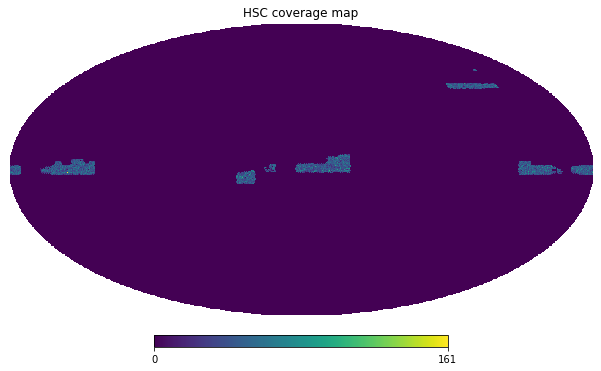

In [4]:
dispSides = 4096
hsc_combined = {}
hsc_combined['dec'] = []
hsc_combined['ra'] = []

# Generate combined HSC catalog
for hsc_file_name in hsc_files:
  hsc_data = getdata(hsc_dir_name+hsc_file_name, 1)
  if len(hsc_combined)  == 0:
    hsc_combined['dec'] = hsc_data['dec']
    hsc_combined['ra'] = hsc_data['ra']
  else:
    hsc_combined['dec'] = np.concatenate((hsc_combined['dec'], hsc_data['dec']))
    hsc_combined['ra'] = np.concatenate((hsc_combined['ra'], hsc_data['ra']))

hsc_map = np.bincount(hp.ang2pix(dispSides, hsc_combined['ra'], hsc_combined['dec'], lonlat=True), minlength=12*dispSides**2)
hp.mollview(hsc_map, title='HSC coverage map')
plt.show()

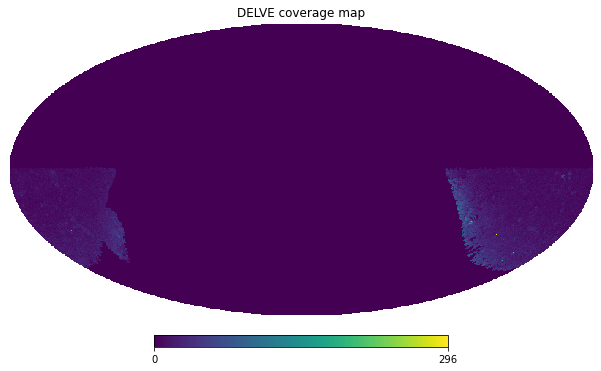

In [5]:
# Get overlapping pixel list
delve_combined = {}
delve_combined['DEC'] = []
delve_combined['RA'] = []

delve_pixel_list = np.genfromtxt(delve_pix_list, dtype='str')

# Open Delve pixel
for pixel in delve_pixel_list:
  delve_fqpn = delve_dir_name + delve_base_file_name + pixel + delve_ext
  delve_data = getdata(delve_fqpn, 1)

  if len(delve_combined)  == 0:
    delve_combined['DEC'] = delve_data['DEC']
    delve_combined['RA'] = delve_data['RA']
  else:
    delve_combined['DEC'] = np.concatenate((delve_combined['DEC'], delve_data['DEC']))
    delve_combined['RA'] = np.concatenate((delve_combined['RA'], delve_data['RA']))

delve_map = np.bincount(hp.ang2pix(dispSides, delve_combined['RA'], delve_combined['DEC'], lonlat=True), minlength=12*dispSides**2)
hp.mollview(delve_map, title='DELVE coverage map')
plt.show()

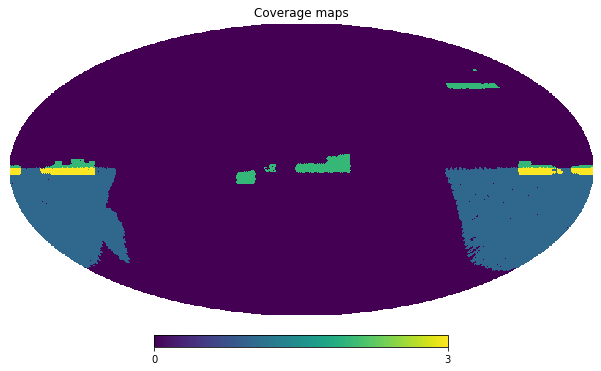

In [7]:
delve_coverage = np.zeros_like(delve_map)
delve_coverage[delve_map > 0] = 1.0

hsc_coverage = np.zeros_like(hsc_map)
hsc_coverage[hsc_map > 0] = 2.0

combo_coverage = delve_coverage + hsc_coverage
hp.mollview(combo_coverage, title='Coverage maps')
plt.show()

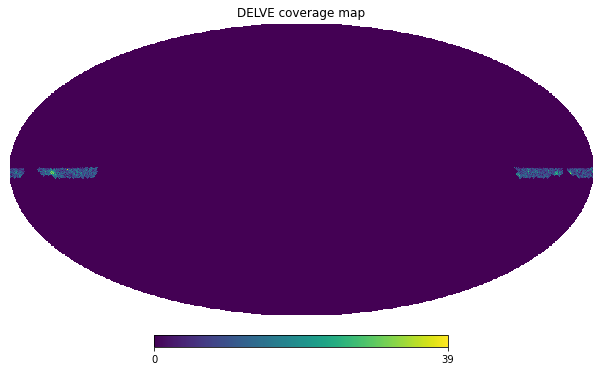

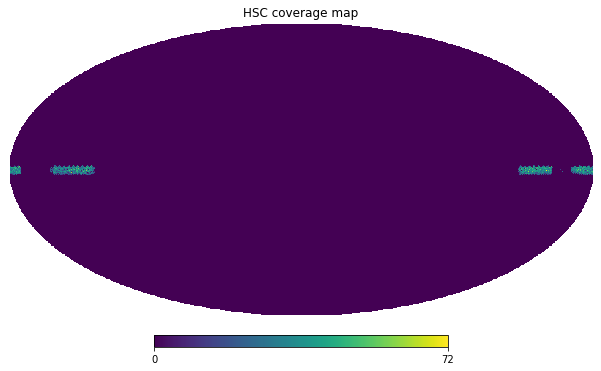

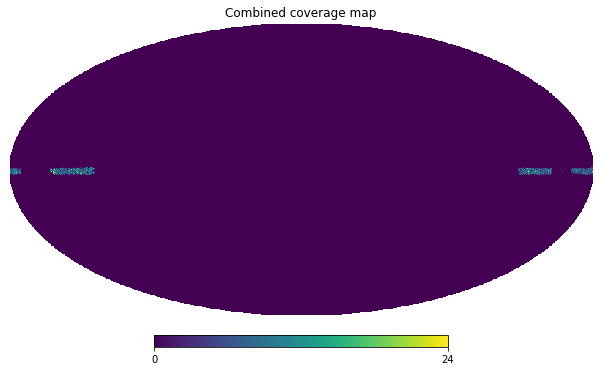

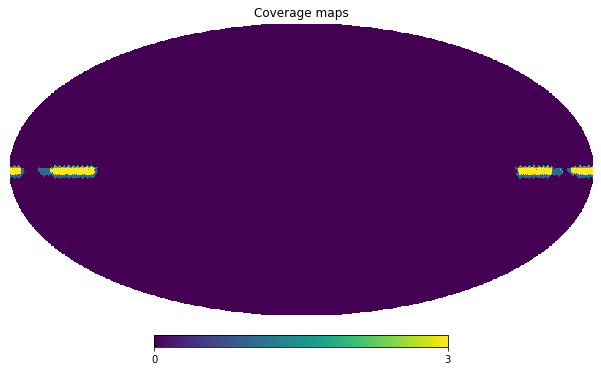

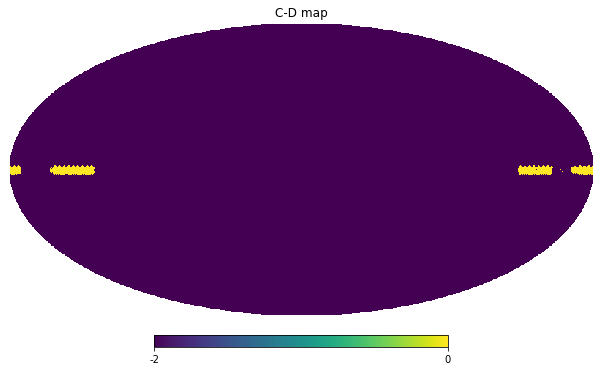

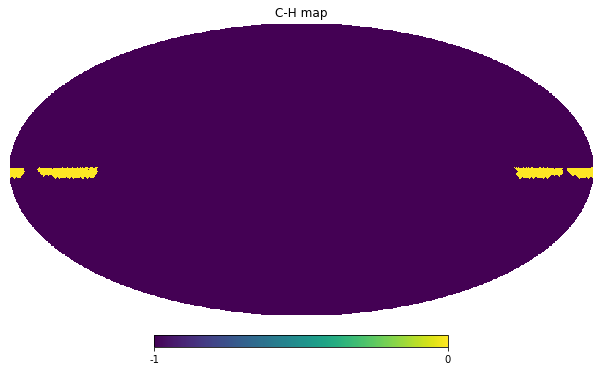

In [6]:
dispSides = 4096
dir_name = '/home/s1/djsuson/data/'
d2h_combo_file_name = 'delve2hsc_v2.fits'
delve_file_name = 'delve_overlap.fits'
hsc_file_name = 'hsc_overlap_v2.fits'
base_combo_data = getdata(dir_name+d2h_combo_file_name, 1)
base_delve_data = getdata(dir_name+delve_file_name, 1)
base_hsc_data = getdata(dir_name+hsc_file_name, 1)
dc_map = np.bincount(hp.ang2pix(dispSides, base_delve_data['RA'], base_delve_data['DEC'], lonlat=True), minlength=12*dispSides**2)
hc_map = np.bincount(hp.ang2pix(dispSides, base_hsc_data['ra'], base_hsc_data['dec'], lonlat=True), minlength=12*dispSides**2)
cc_map = np.bincount(hp.ang2pix(dispSides, base_combo_data['RA'], base_combo_data['DEC'], lonlat=True), minlength=12*dispSides**2)
hp.mollview(dc_map, title='DELVE coverage map')
plt.show()
hp.mollview(hc_map, title='HSC coverage map')
plt.show()
hp.mollview(cc_map, title='Combined coverage map')
plt.show()
dover_coverage = np.zeros_like(dc_map)
dover_coverage[dc_map > 0] = 1.0
hover_coverage = np.zeros_like(hc_map)
hover_coverage[hc_map > 0] = 2.0
cover_coverage = dover_coverage + hover_coverage
hp.mollview(cover_coverage, title='Coverage maps')
plt.show()
dc_coverage = cover_coverage - 2.0 - dover_coverage
hc_coverage = cover_coverage - 1.0 - hover_coverage
hp.mollview(dc_coverage, title='C-D map')
plt.show()
hp.mollview(hc_coverage, title='C-H map')


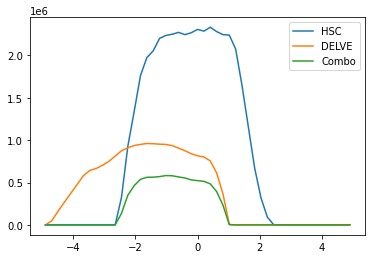

In [10]:
bins = np.linspace(-5,5)
centers = (bins[1:] + bins[:-1]) / 2.0
combo_hist, _ = np.histogram(base_combo_data['DEC'], bins=bins)
delve_hist, _ = np.histogram(base_delve_data['DEC'], bins=bins)
hsc_hist, _ = np.histogram(base_hsc_data['dec'], bins=bins)
plt.plot(centers, hsc_hist, label='HSC')
plt.plot(centers, delve_hist, label='DELVE')
plt.plot(centers, combo_hist, label='Combo')
plt.legend()

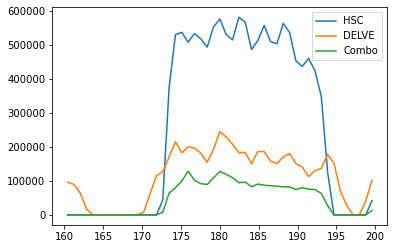

In [12]:
bins = np.linspace(160,200)
centers = (bins[1:] + bins[:-1]) / 2.0
combo_hist, _ = np.histogram(base_combo_data['RA'], bins=bins)
delve_hist, _ = np.histogram(base_delve_data['RA'], bins=bins)
hsc_hist, _ = np.histogram(base_hsc_data['ra'], bins=bins)
plt.plot(centers, hsc_hist, label='HSC')
plt.plot(centers, delve_hist, label='DELVE')
plt.plot(centers, combo_hist, label='Combo')
plt.legend()